# Flight Price Prediction

In [50]:
import pandas as pd
import numpy as np

In [51]:
df=pd.read_csv(r"C:\Users\PJugantM\Downloads\flight_data.csv") 
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [52]:
df.shape

(10683, 11)

In [53]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [54]:
df.dropna(inplace =True)

In [55]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


### LETS do the EDA

In [57]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [58]:
# Lets Replace Date of Journey with separate col as Journey day or Journey Month .
df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.day

df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.month

In [59]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [60]:
# Also Create Departure Min and Hour from Departure column 
df['dep_hour'] = pd.to_datetime(df.Dep_Time).dt.hour

df['dep_min'] = pd.to_datetime(df.Dep_Time).dt.minute

C:\Users\PJugantM\AppData\Local\Temp\ipykernel_1688\3998009824.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['dep_hour'] = pd.to_datetime(df.Dep_Time).dt.hour
C:\Users\PJugantM\AppData\Local\Temp\ipykernel_1688\3998009824.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['dep_min'] = pd.to_datetime(df.Dep_Time).dt.minute


In [61]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,dep_hour,dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [62]:
# Now we dont need these below columns :'Date_of_Journey','Dep_Time'
df.drop(columns=['Date_of_Journey','Dep_Time'],inplace=True)

In [63]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [64]:
#df.drop(columns=['Arrival_Time'],inplace=True)

In [65]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [66]:
# Lets convert Duration columns into List .
duration =list(df.Duration) 
len(duration)

10682

In [67]:
df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [68]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip() + " 0m " # Adding 0 min to have same format 
        elif 'm' in duration[i]:
            duration[i] = "0h {}".format(duration[i].strip())

In [69]:
# crrate a separete list for dur_hours and duration_minutes 

duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split()[0][:-1])) # To extract Hour
    duration_mins.append(int(duration[i].split()[1][:-1]))  # To extract Min


In [70]:
duration_mins

[50,
 25,
 0,
 25,
 45,
 25,
 30,
 5,
 30,
 50,
 15,
 35,
 15,
 10,
 35,
 35,
 30,
 35,
 0,
 35,
 10,
 20,
 50,
 55,
 20,
 10,
 45,
 55,
 50,
 15,
 15,
 25,
 50,
 0,
 30,
 25,
 15,
 30,
 15,
 55,
 5,
 30,
 5,
 45,
 0,
 50,
 50,
 15,
 5,
 55,
 15,
 20,
 50,
 0,
 50,
 15,
 5,
 15,
 30,
 5,
 25,
 20,
 15,
 30,
 15,
 25,
 50,
 30,
 20,
 15,
 25,
 30,
 20,
 30,
 0,
 45,
 50,
 30,
 5,
 15,
 50,
 40,
 10,
 35,
 0,
 20,
 25,
 45,
 20,
 0,
 15,
 5,
 30,
 20,
 35,
 25,
 40,
 0,
 25,
 35,
 20,
 15,
 30,
 0,
 45,
 55,
 10,
 30,
 20,
 55,
 0,
 55,
 45,
 10,
 55,
 25,
 5,
 10,
 40,
 55,
 40,
 25,
 5,
 15,
 25,
 10,
 10,
 0,
 50,
 20,
 0,
 55,
 10,
 45,
 0,
 50,
 40,
 15,
 45,
 50,
 0,
 15,
 25,
 35,
 50,
 35,
 25,
 55,
 50,
 10,
 20,
 25,
 50,
 20,
 15,
 35,
 35,
 50,
 45,
 10,
 50,
 45,
 15,
 20,
 30,
 25,
 30,
 40,
 10,
 45,
 35,
 5,
 30,
 30,
 10,
 35,
 5,
 50,
 0,
 0,
 25,
 30,
 30,
 0,
 20,
 30,
 45,
 10,
 35,
 45,
 55,
 35,
 20,
 5,
 40,
 15,
 10,
 25,
 50,
 25,
 15,
 50,
 15,
 50,
 20,
 55,
 

In [71]:
duration_hours

[2,
 7,
 19,
 5,
 4,
 2,
 15,
 21,
 25,
 7,
 13,
 2,
 2,
 12,
 2,
 26,
 4,
 22,
 23,
 20,
 5,
 15,
 2,
 2,
 13,
 15,
 5,
 5,
 2,
 2,
 2,
 13,
 2,
 22,
 5,
 10,
 5,
 2,
 6,
 11,
 11,
 8,
 22,
 2,
 12,
 2,
 2,
 2,
 16,
 19,
 3,
 25,
 2,
 3,
 2,
 16,
 15,
 2,
 6,
 25,
 12,
 27,
 10,
 10,
 2,
 10,
 2,
 1,
 13,
 2,
 1,
 26,
 7,
 13,
 5,
 2,
 2,
 1,
 19,
 2,
 14,
 2,
 22,
 9,
 10,
 21,
 5,
 18,
 12,
 18,
 9,
 11,
 17,
 13,
 2,
 2,
 2,
 3,
 1,
 16,
 12,
 12,
 7,
 24,
 2,
 8,
 7,
 14,
 30,
 19,
 15,
 2,
 12,
 10,
 5,
 15,
 16,
 10,
 2,
 11,
 2,
 1,
 14,
 20,
 2,
 23,
 18,
 16,
 2,
 2,
 8,
 16,
 3,
 2,
 14,
 23,
 21,
 21,
 2,
 10,
 8,
 8,
 5,
 8,
 11,
 27,
 8,
 20,
 4,
 8,
 2,
 24,
 2,
 12,
 12,
 23,
 16,
 2,
 25,
 26,
 28,
 2,
 25,
 9,
 4,
 15,
 1,
 2,
 9,
 2,
 22,
 3,
 11,
 9,
 12,
 17,
 5,
 25,
 20,
 13,
 18,
 1,
 9,
 16,
 2,
 4,
 5,
 24,
 2,
 2,
 4,
 25,
 6,
 3,
 18,
 2,
 12,
 19,
 2,
 8,
 9,
 2,
 3,
 2,
 12,
 2,
 9,
 2,
 9,
 29,
 2,
 5,
 9,
 10,
 4,
 1,
 11,
 2,
 2,
 10,
 2,
 10,
 1,
 9,
 

In [72]:
# Now we can create columns using above LIST 
df['duration_hours']= duration_hours
df['duration_mins'] = duration_mins

In [73]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,dep_hour,dep_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,7,25


In [74]:
df.drop(["Duration"],axis=1,inplace=True) 

In [75]:
df.head(2) 

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,dep_hour,dep_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,non-stop,No info,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,2 stops,No info,7662,1,5,5,50,7,25


In [76]:
#UNIQUE RECORDS and their Frequency in AIRLINE 
df['Airline'].value_counts()


Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [77]:
df.Airline = df.Airline.apply(lambda x: x.strip())
airline_stats = df.Airline.value_counts(ascending= False) 

In [78]:
# WE CAN APPLY DIMENTIONALITY REDUCTION 
airline_stats_less_than_10 = airline_stats [airline_stats <= 10]

In [79]:
df.Airline = df.Airline.apply(lambda x: 'other' if x in airline_stats_less_than_10 else x)

In [80]:
df.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
other                                  10
Name: count, dtype: int64

In [81]:
df.Airline.nunique() 

10

In [82]:
df.Route.head()

0                BLR ? DEL
1    CCU ? IXR ? BBI ? BLR
2    DEL ? LKO ? BOM ? COK
3          CCU ? NAG ? BLR
4          BLR ? NAG ? DEL
Name: Route, dtype: object

In [83]:
df.Additional_Info.value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [84]:
df.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,dep_hour,dep_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,non-stop,No info,3897,24,3,22,20,2,50


In [85]:
df.drop(columns=["Route","Additional_Info"],inplace=True)

In [86]:
df.head(2)

,Airline,Source,Destination,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,dep_hour,dep_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,non-stop,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,13:15,2 stops,7662,1,5,5,50,7,25


In [87]:
df.Total_Stops.value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [88]:
# Total Stops is a ordinal categorical column so we will label it 
df.replace({"non-stop":0 ,
          "1 stop":1 ,
           "2 stops":2 ,
           "3 stops":3, "4 stops":4},inplace=True ) 

C:\Users\PJugantM\AppData\Local\Temp\ipykernel_1688\830577698.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"non-stop":0 ,


In [89]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Arrival_Time', 'Total_Stops',
       'Price', 'Journey_Day', 'Journey_Month', 'dep_hour', 'dep_min',
       'duration_hours', 'duration_mins'],
      dtype='object')

In [90]:
# Using Arrival time : Create new col as arrival hour and arrival min .
df['arrival_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
df['arrival_min'] = pd.to_datetime(df.Arrival_Time).dt.minute

C:\Users\PJugantM\AppData\Local\Temp\ipykernel_1688\1385204854.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['arrival_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
C:\Users\PJugantM\AppData\Local\Temp\ipykernel_1688\1385204854.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['arrival_min'] = pd.to_datetime(df.Arrival_Time).dt.minute


In [91]:
df.head(2)

,Airline,Source,Destination,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,dep_hour,dep_min,duration_hours,duration_mins,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,0,3897,24,3,22,20,2,50,1,10
1,Air India,Kolkata,Banglore,13:15,2,7662,1,5,5,50,7,25,13,15


In [92]:
df.drop(columns=["Arrival_Time"],inplace=True)

In [93]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,dep_hour,dep_min,duration_hours,duration_mins,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,2,50,1,10
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,7,25,13,15


In [97]:
df_dummies = pd.get_dummies(data=df, columns=["Airline", "Source", "Destination"], drop_first=True).astype(int)


In [99]:
df_dummies

,Total_Stops,Price,Journey_Day,Journey_Month,dep_hour,dep_min,duration_hours,duration_mins,arrival_hour,arrival_min,...,Airline_other,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,2,50,1,10,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,7,25,13,15,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,19,0,4,25,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,5,25,23,30,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,4,45,21,35,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,2,30,22,25,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,2,35,23,20,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,3,0,11,20,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,2,40,14,10,...,0,0,0,0,0,0,0,0,0,1


In [100]:
#independent and dependent features 
x=df_dummies.drop("Price",axis=1)
y=df_dummies['Price'] 

In [101]:
x

,Total_Stops,Journey_Day,Journey_Month,dep_hour,dep_min,duration_hours,duration_mins,arrival_hour,arrival_min,Airline_Air India,...,Airline_other,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,2,50,1,10,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,7,25,13,15,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,19,0,4,25,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,5,25,23,30,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,4,45,21,35,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,2,30,22,25,0,...,0,0,0,1,0,0,0,0,0,0
10679,0,27,4,20,45,2,35,23,20,1,...,0,0,0,1,0,0,0,0,0,0
10680,0,27,4,8,20,3,0,11,20,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,11,30,2,40,14,10,0,...,0,0,0,0,0,0,0,0,0,1


In [102]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int32

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

In [104]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8545, 27)
(2137, 27)
(8545,)
(2137,)


In [105]:
## Now we'll apply Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [106]:
preds = rf_model.predict(x_test)
preds

array([ 5351.73  , 11576.114 , 13216.91  , ..., 13880.2845,  7914.41  ,
        4395.08  ])

In [107]:
rf_model.score(x_train, y_train)


0.9540191084126101

In [108]:
rf_model.score(x_test, y_test)


0.80881558006033

Text(0, 0.5, 'preds')

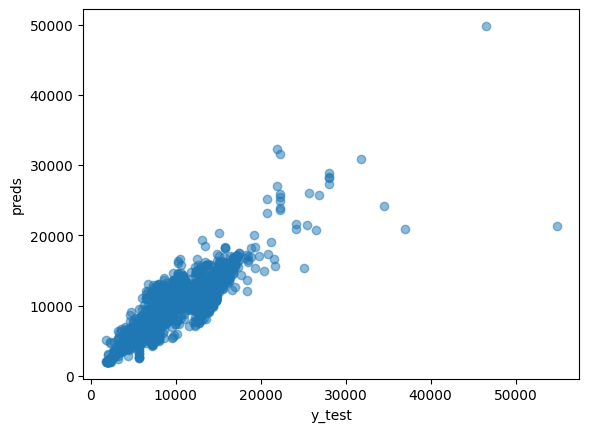

In [110]:
## Scatterplot
import matplotlib.pyplot as plt
plt.scatter(y_test, preds, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('preds')

In [111]:
## Evaluation
from sklearn import metrics

In [112]:
print('MAE: ', metrics.mean_absolute_error(y_test, preds))
print('MSE: ', metrics.mean_squared_error(y_test, preds))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, preds)))

print('r2_score: ', metrics.r2_score(y_test, preds))

MAE:  1215.3520872051624
MSE:  3921324.44844037
RMSE:  1980.233432815528
r2_score:  0.80881558006033


In [113]:
## Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV

In [114]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12 )]
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]
max_features = ['auto', 'sqrt', 'log2']
min_samples_split = [2,5,10,15,20,100]
min_samples_leaf = [1,2,5,6,7,10]

In [115]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 20, 100], 'min_samples_leaf': [1, 2, 5, 6, 7, 10]}


In [116]:
rf_random_model = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, scoring = 'neg_mean_squared_error',
                                    n_iter = 10, cv = 5, verbose = 2, random_state = 1, n_jobs = 1)

In [117]:
rf_random_model.fit(x_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   8.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   7.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   8.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   8.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   8.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_es

C:\Users\PJugantM\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PJugantM\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PJugantM\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\PJugantM\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 6, 7, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=1, scoring='neg_mean_squared_error', verbose=2)

In [118]:
rf_random_model.best_params_


{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 7,
 'max_features': 'log2',
 'max_depth': 20}

In [119]:
predictions = rf_random_model.predict(x_test)


Text(0, 0.5, 'predictions')

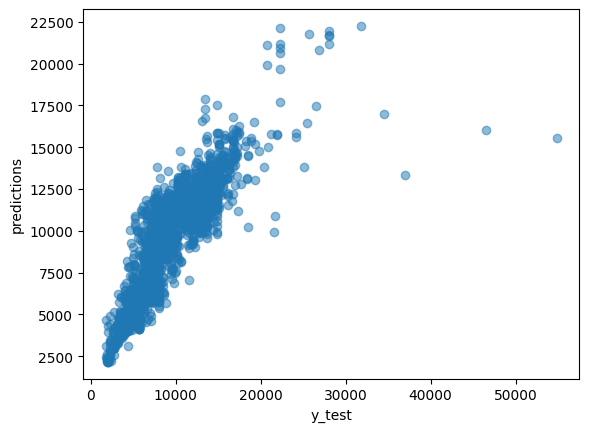

In [120]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('predictions')

In [121]:
print('MAE: ', metrics.mean_absolute_error(y_test, predictions) )
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print('r2_score: ', metrics.r2_score(y_test, predictions))

MAE:  1452.0369837525486
MSE:  5202264.515594409
RMSE:  2280.847324043065
r2_score:  0.746363266578917


In [122]:
## Important features using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
sel = ExtraTreesRegressor()
sel.fit(x,y)

ExtraTreesRegressor()

In [123]:
print(sel.feature_importances_)


[0.22751015 0.14362571 0.05344359 0.0248665  0.02420453 0.11570282
 0.01796189 0.02801753 0.01959293 0.01344297 0.00199828 0.01937578
 0.14177436 0.01812606 0.00083443 0.00364153 0.00491576 0.05359154
 0.0005634  0.01258569 0.00384369 0.00897346 0.00903259 0.01469761
 0.0104964  0.00048592 0.02669487]


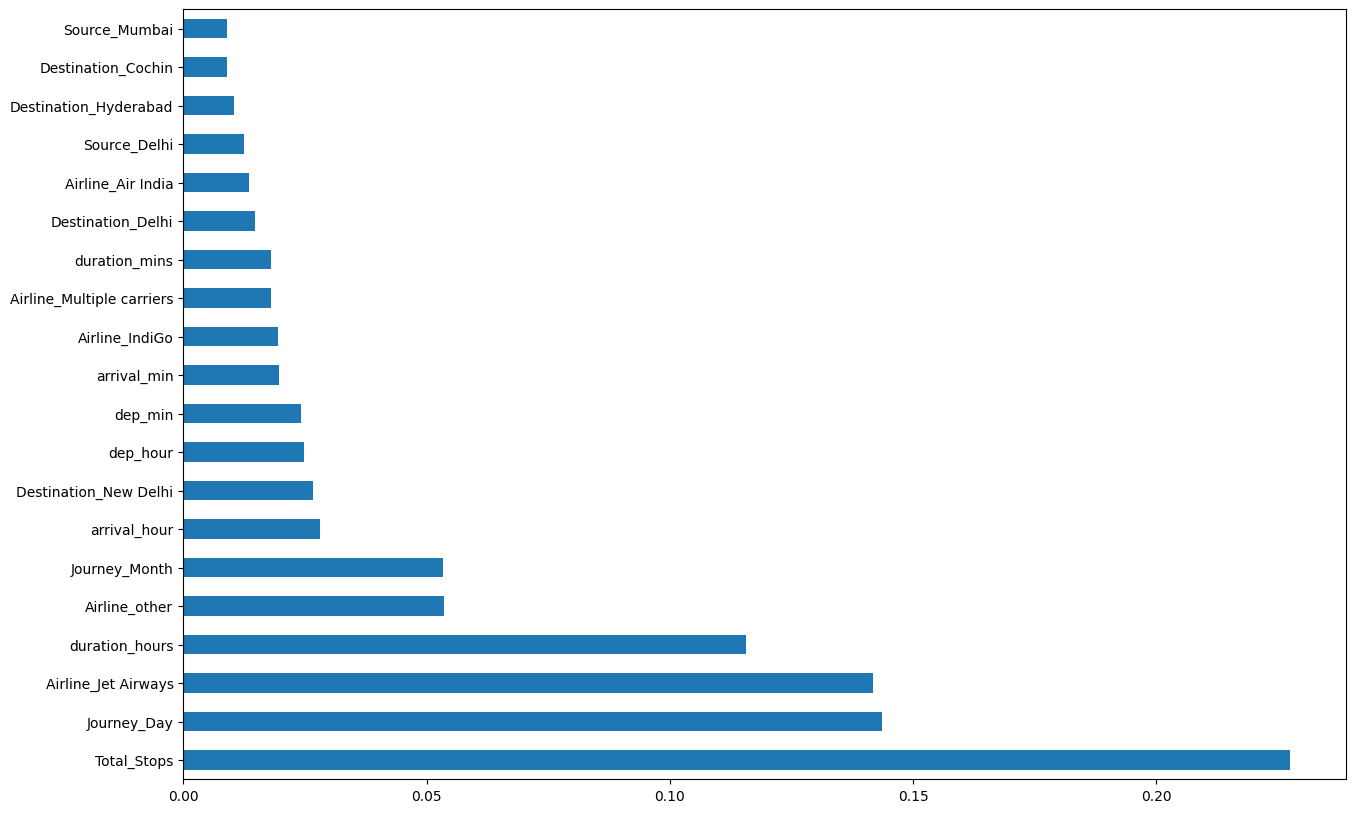

In [124]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
feature_imp = pd.Series(sel.feature_importances_, index = x.columns)
feature_imp.nlargest(20).plot(kind = 'barh')
plt.show()